#Logistic Regression is good for binary classification. It is a classification model. It uses the sigmoid function. There are several ways to fit the model.
## -Gradient Descent
## -Maximum-likelihod method

We do logit transformation to make it linear. So, logistic regression is a linear regression on the logit transformation.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression



<ipython-input-3-ab068cf53f49>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1,y1, 'ro', color = 'blue')
<ipython-input-3-ab068cf53f49>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x2,y2, 'ro', color = 'red')


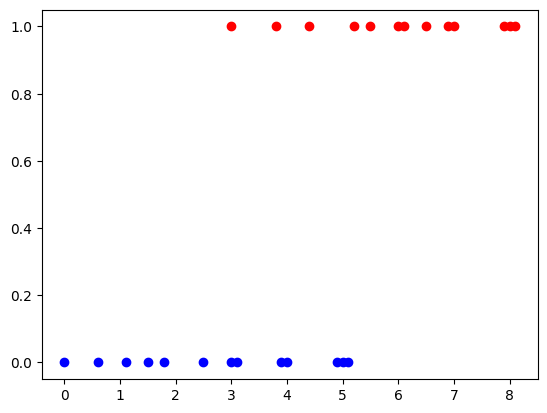

In [ ]:
x1 = np.array([0,0.6,1.1, 1.5, 1.8, 2.5, 3, 3.1, 3.9,4, 4.9,5, 5.1])
y1 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
x2 = np.array([3,3.8,4.4,5.2,5.5,6.5,6,6.1,6.9, 7,7.9,8,8.1])
y2 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])

plt.plot(x1,y1, 'ro', color = 'blue')
plt.plot(x2,y2, 'ro', color = 'red')

plt.show()

As there are overlaps, these datapoints cannot be classsified linearly. We need the logistic regression.

In [ ]:
X = np.array([
    [0],[0.6],[1.1], [1.5], [1.8], [2.5], [3], [3.1], [3.9],[4], [4.9],[5], [5.1], [3],[3.8],[4.4],[5.2],[5.5],[6.5],[6],[6.1],[6.9], [7],[7.9],[8],[8.1]
])
y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]
             )

model = LogisticRegression()
model.fit(X,y)



LogisticRegression()

In [ ]:
print('b8 is:', model.intercept_)
print('b1 is:', model.coef_)

b8 is: [-4.50163542]
b1 is: [[1.00401882]]


<ipython-input-9-83894df56324>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(i/10.0-2, logistic(model, i/10.0), 'ro', color = 'green')
<ipython-input-9-83894df56324>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1,y1, 'ro', color = 'blue')
<ipython-input-9-83894df56324>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x2,y2, 'ro', color = 'red')


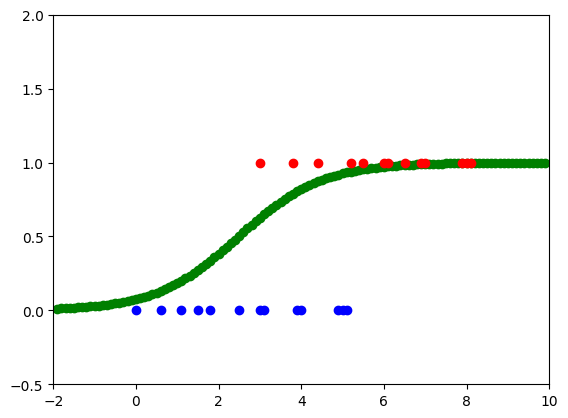

In [ ]:
def logistic(classifier,x):
  return 1/(1+ np.exp(-(model.intercept_ + model.coef_ *x)))

for i in range(1,120):
  plt.plot(i/10.0-2, logistic(model, i/10.0), 'ro', color = 'green')

plt.plot(x1,y1, 'ro', color = 'blue')
plt.plot(x2,y2, 'ro', color = 'red')
plt.axis([-2, 10, -0.5,2])
plt.show()

In [ ]:
pred = model.predict(([[1]]))
print('Prediction: ', pred)

Prediction:  [0]


In [ ]:
pred = model.predict_proba(([[8]]))
print('Prediction: ', pred)

Prediction:  [[0.02845634 0.97154366]]


So, there is 97% probability of the data being from the red dots.

# Credit Score prediction using Logistic Regression

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [8]:
credit_data = pd.read_csv('/content/credit_data.csv')
credit_data.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [9]:
credit_data.describe()

,clientid,income,age,loan,LTI,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,577.494589,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,500.750000,32796.459717,29.062492,1939.708847,0.047903,0.000000
50%,1000.500000,45789.117313,41.382673,3974.719419,0.099437,0.000000
75%,1500.250000,57791.281668,52.596993,6432.410625,0.147585,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,0.199938,1.000000


In [10]:
credit_data.corr()

,clientid,income,age,loan,LTI,default
clientid,1.000000,0.039280,-0.030341,0.018931,0.002538,-0.020145
income,0.039280,1.000000,-0.034984,0.441117,-0.019862,0.002284
age,-0.030341,-0.034984,1.000000,0.006561,0.021588,-0.444765
loan,0.018931,0.441117,0.006561,1.000000,0.847495,0.377160
LTI,0.002538,-0.019862,0.021588,0.847495,1.000000,0.433261
default,-0.020145,0.002284,-0.444765,0.377160,0.433261,1.000000


In [12]:
features = credit_data[['income', 'age', 'loan']]
target = credit_data.default

We are going to use multiple logistic regression.

In [14]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)

In [16]:
model = LogisticRegression()
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)

In [17]:
confusion_matrix(target_test, predictions)


array([[504,  16],
       [ 35,  45]])

504 values of 0 are predicted correctly and 35 are incorrect. 45 values of 1 are predicted correctly and 16 are incorrect.

In [18]:
accuracy_score(target_test, predictions)

0.915

In [19]:
model.coef_

array([[-6.28954483e-05, -1.35302216e-01,  9.36183698e-04]])

Values of b1, b2, b3

In [20]:
model.intercept_

array([-0.00068418])

Values of b0